In [1]:
from PIL import Image
import binascii
from IPython.display import display
import numpy as np

In [2]:
def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):               # convertir le texte en utf-8
    bits = bin(int(binascii.hexlify(text.encode(encoding, errors)), 16))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))


def int2bytes(i):
    hexstring = '%x' % i
    n = len(hexstring)
    return binascii.unhexlify(hexstring.zfill(n + (n & 1)))


def text_from_bits(bits, encoding='utf-8', errors='surrogatepass'):           # convertir l'utf-8 en texte
    n = int(bits, 2)
    return int2bytes(n).decode(encoding, errors)

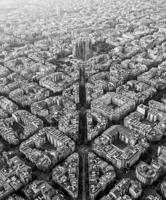

In [19]:
message_a_dissimuler = "Vue aerienne de la ville de barcelone"
image = "Barcelone.jpg"

image1 = Image.open(image).convert('L')

L, H = image1.size 

print("Dimensions de notre image :", L, "x" ,H)

print("Image originale en niveau de gris :")
display(image1)

In [4]:
image_array = np.array(image1)

print(image_array)            # afficher les valeurs de chaque pixel

[[226 226 227 ... 160 162 162]
 [226 226 226 ... 160 158 158]
 [226 226 226 ... 170 167 167]
 ...
 [ 77  92  87 ...   8   5   4]
 [ 77  74  59 ...   8   6   5]
 [ 76  57  38 ...   8   6   7]]


In [5]:
def code(image1, message_a_dissimuler, image2="image_codée.png"):          
    pixels = image1.load()            # accéder au valeurs des pixels de l'image pour pouvoir les modifiers
    L, H = image1.size

    message_a_dissimuler_bin = text_to_bits(message_a_dissimuler) + '11111111'      # convertir le message choisit en binaire

    bit_index = 0                 # initialisation de la premiere position du message binaire à cacher
    for x in range(L):
        for y in range(H):
            p = pixels[x, y]

            if p % 2 != 0:               # si le pixel est impair , on le rend pair 
                p = (p//2)*2

            if bit_index < len(message_a_dissimuler_bin):                # si la valeur de bit_index < longueur du message binaire à cacher,
                p += int(message_a_dissimuler_bin[bit_index])            # on cache le bit du message binaire dans le bit du poids faible et on passe
                bit_index += 1                                           # à la position suivante. et ainsi de suite

            if bit_index >= len(message_a_dissimuler_bin):     # si la valeur de bit_index >= longueur du message binaire à cacher, cela signifie
                p = 255                                       # que tous les bits du message ont été cachés.
                                                              # donc on définit la valeur du pixel à 255 ( marqueur de fin (11111111) en binaire ) .
            pixels[x, y] = p

            if bit_index >= len(message_a_dissimuler_bin):#Si tous les bits du message ont été cachés,on sort de la boucle interne (parcours des lignes)
                break                                     # et de la boucle externe (parcours des colonnes)
        if bit_index >= len(message_a_dissimuler_bin):
            break

    image1.save(image2)      
    return image1

In [7]:
def decode(image2):
    image = Image.open(image2)  
    pixels = image.load()
    L, H = image.size

    message_bin = ""              # initialisation d'une chaîne de caractères qui stockera les bits extraits de l'image
    for x in range(L):
        for y in range(H):
            p = pixels[x, y]
            message_bin += str(p % 2)           # extraire le bit de poids faible

            if len(message_bin) % 8 == 0 and message_bin[-8:] == '11111111':     # on vérifie si on a atteint le marqueur de fin

                return text_from_bits(message_bin[:-8])       # recuperer le message sans le marqueur de fin

image aprés le codage :


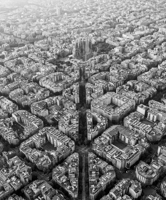

In [18]:
nouvelle_image = code(image1, message_a_dissimuler, image2="image_codée.png")
image_reduite2 = nouvelle_image.resize((nouvelle_image.width // 6, nouvelle_image.height // 6))
print("image aprés le codage :")
display(image_reduite2)

In [9]:
message_caché = decode("image_codée.png")
print("le message caché dans cette image est : ", message_caché)

le message caché dans cette image est :  Vue aerienne de la ville de barcelone
